In [2]:
#performing eda

In [3]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
df=pd.read_csv('EasyVisa.csv.zip')
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
df.shape

(25480, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
df.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
#dropping unnecessary columns
df.drop(columns=['case_id'],inplace=True)

KeyError: "['case_id'] not found in axis"

exploring numberical and catrogical value

In [21]:
#checking dtype for df.dtypes
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [22]:
df.dtypes

continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

#### step 2 separating numeric feature with categorical feature 

In [27]:
numeric_features=[i for i in df.columns if df[i].dtype!='object']
categorical_features=[i for i in df.columns if df[i].dtype=='object']

print(len(numeric_features),numeric_features)
print(len(categorical_features),categorical_features)

3 ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
8 ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


#### STEP 3: We check proportion of caterogrical feature appearing data to understand which is needed and which
#### is not using value_count*100

In [28]:
for i in categorical_features:
    print(df[i].value_counts(normalize=True)*100)
    print('-----------------------------------')

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-----------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-----------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-----------------------------------
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
-----------------------------------
unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: proportion, dtype: float64
--

#### insights
##### 1: continents columns is highly biased for asia ., 
##### 2: unit of wages column is important as most are yearly contract
##### 3:full_time_position data are high in numnber compared to non full time

### step 4: Univariate analysis
puporse of this is to understand distrbtion of value for single column in data, how single column value are distrubted accross the all rows in single column

we have : bivariate and multivariate as well where we do analysi for 2 in bi and more than 2 for multi

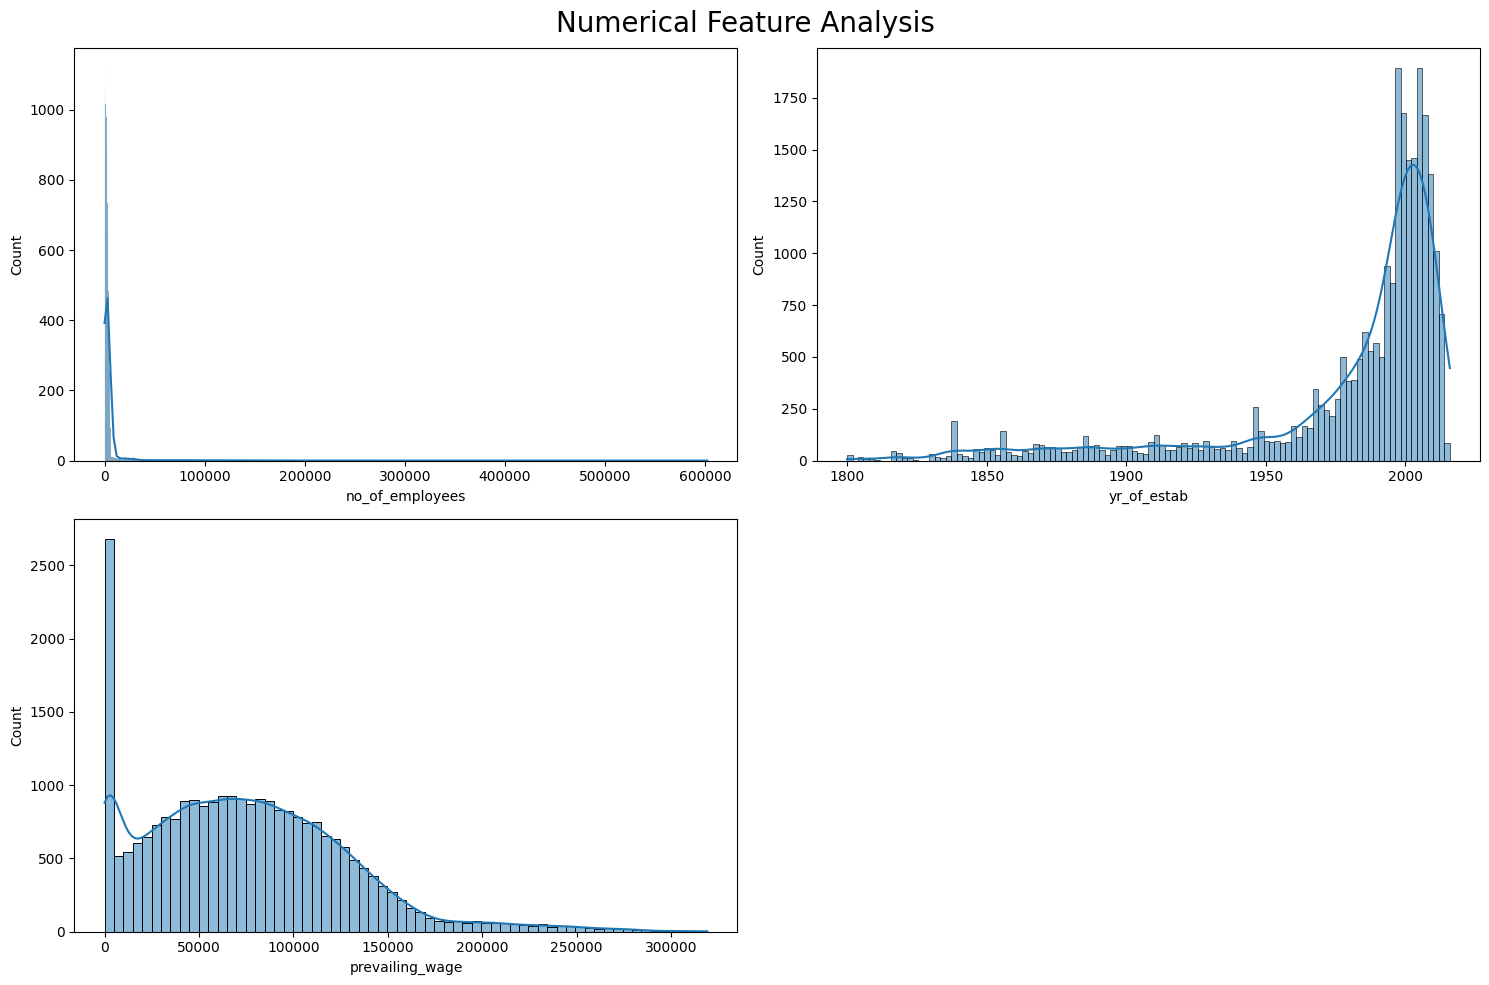

In [46]:
#Numerical feature analysis for plotting
plt.figure(figsize=(15,10))
plt.suptitle('Numerical Feature Analysis',fontsize=20)
for i,j in enumerate(numeric_features):
    plt.subplot(2,2,i+1)
    sns.histplot(df[j],kde=True) #kde is kernel density estimation plot used to show the distribution curve

    plt.tight_layout()

insights:

    1: no_of_employee = more right skewed , has outlier

    2: yr_of_est = is a discrete feature (countable)

    3: privailing_wage = is right skewed , has outlier prolly

Now for categorical feature:


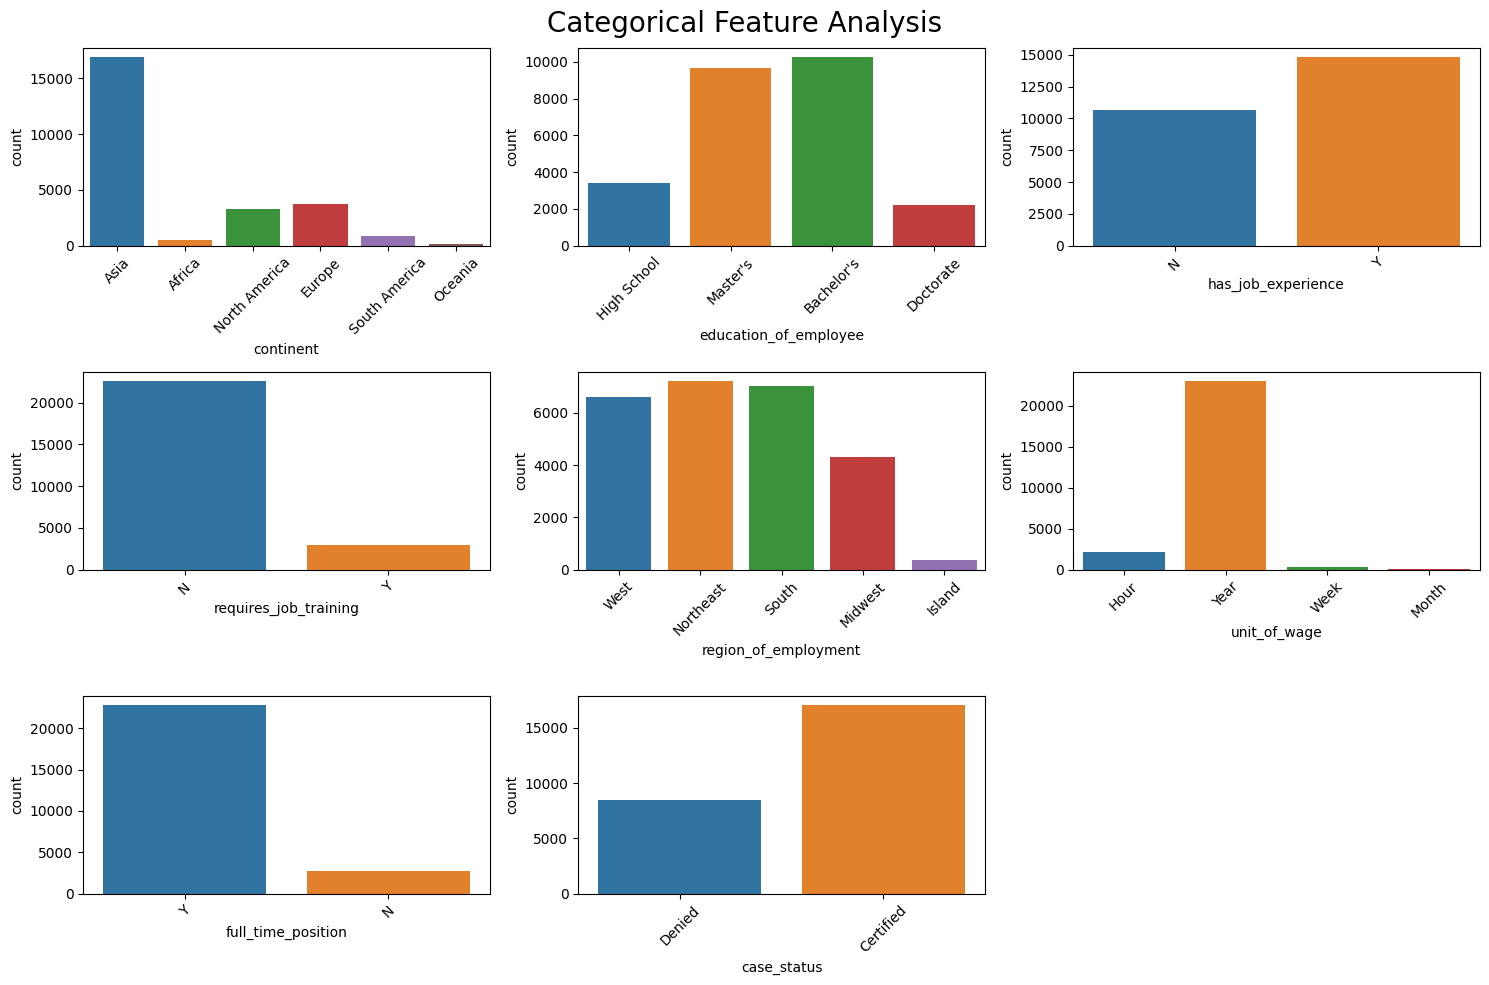

In [47]:
plt.figure(figsize=(15,10))
plt.suptitle('Categorical Feature Analysis',fontsize=20)
for i,j in enumerate(categorical_features):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[j]) #countplot is used to show count of each category in categorical feature
    plt.xticks(rotation=45)
    plt.tight_layout()

### Step 5:
multivairate analysis

its analysis of more than one column

first we will divide discrete and continous var separatley. 

anything which is occuring and countable is discrete wheras countinous is anything in a range like
1-10 so 2 is countinous 2.2 can also come here anything in float so we need to divide this with discrete

easy method is if unique value in columns is appearing less than 25 then its discrete else its continous

In [48]:
discrete_features=[i for i in numeric_features if len(df[i].unique())<=25]
continuous_features=[i for i in numeric_features if len(df[i].unique())>25]

print(len(discrete_features),discrete_features)
print(len(continuous_features),continuous_features)

0 []
3 ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


Performing multicollinearity test: this is to test how diff column are collinear to each other

we will perform chi-squared test here in this case

chi-squared test: is a statistical test used to check whether there’s a relationship between two categorical  variables 

here we have 2 case.

1: null hypothese (Ho): which in simple means "no correleation"  feature is independted of target column

2: Alternate hypothese (Ha): Feature and targeet are co related. 

In [52]:
from scipy.stats import chi2_contingency
chi2_test=[]
for i in categorical_features:
    if chi2_contingency(pd.crosstab(df[i],df['case_status']))[1]<0.05:
        chi2_test.append('Null hypothesis rejected')
    else:
        chi2_test.append('Null hypothesis accepted') #accepted means feature is not important for target variable
results=pd.DataFrame(data=[categorical_features,chi2_test]).T
results.columns=['Categorical Feature','Chi2 Test Result']
results

,Categorical Feature,Chi2 Test Result
0,continent,Null hypothesis rejected
1,education_of_employee,Null hypothesis rejected
2,has_job_experience,Null hypothesis rejected
3,requires_job_training,Null hypothesis accepted
4,region_of_employment,Null hypothesis rejected
5,unit_of_wage,Null hypothesis rejected
6,full_time_position,Null hypothesis rejected
7,case_status,Null hypothesis rejected


requires_job_training is not important feature as its not corrleated with target column

### step 6: 
checking null values

In [53]:
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

no null value

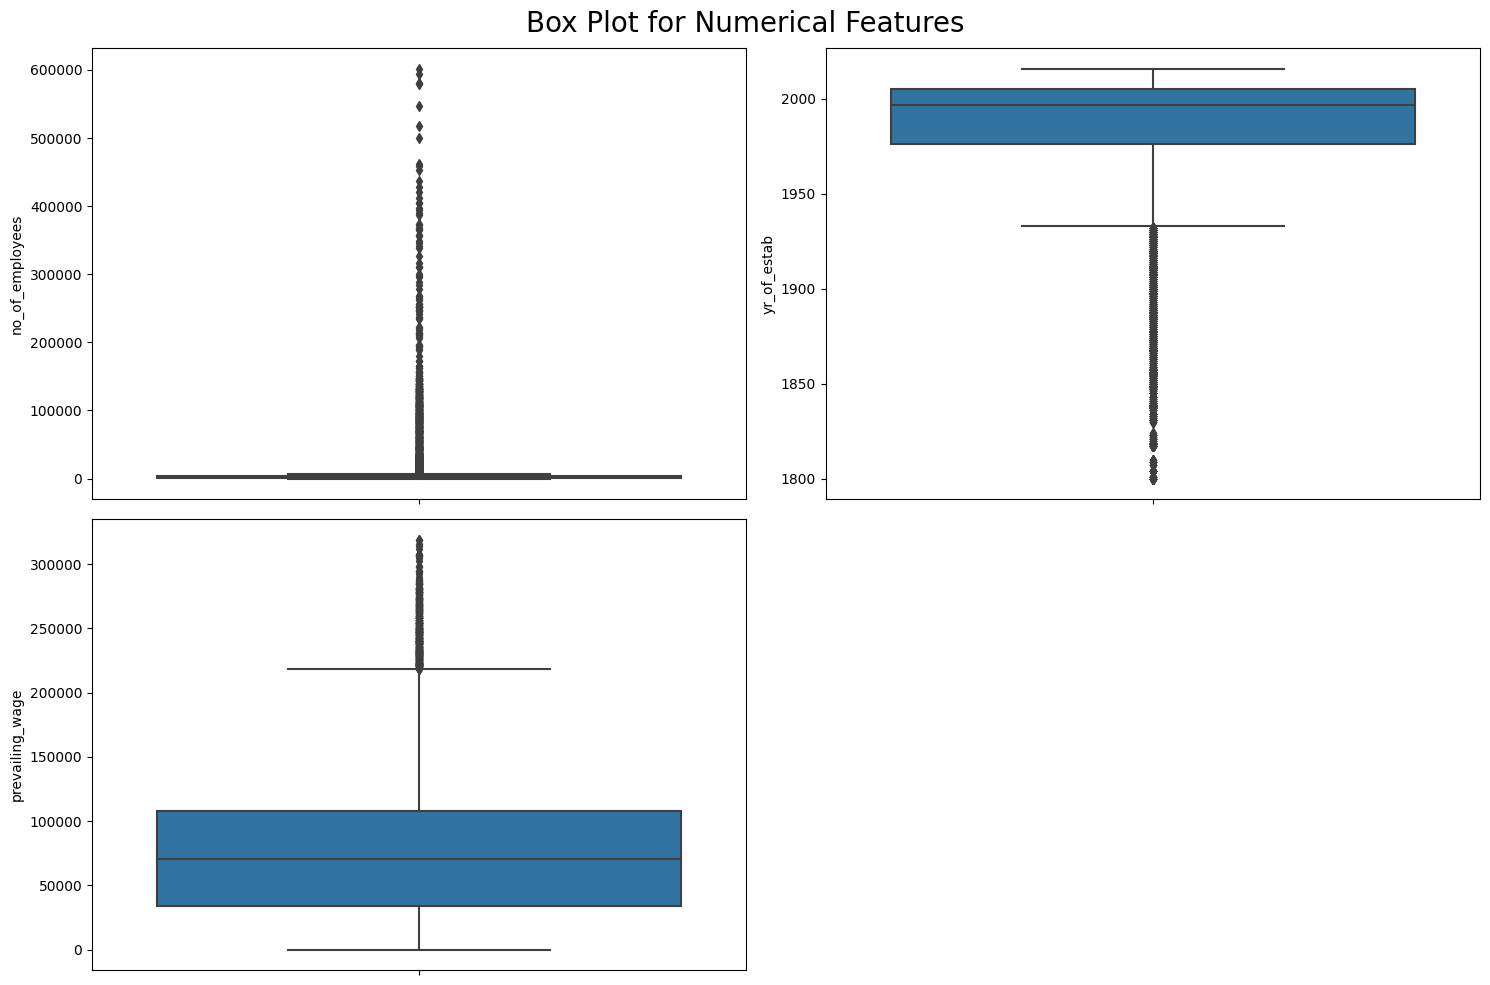

In [54]:
#finding box plot for numerical features
plt.figure(figsize=(15,10))
plt.suptitle('Box Plot for Numerical Features',fontsize=20)
for i,j in enumerate(numeric_features):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[j])
    plt.tight_layout()

report

1: no of employe col: has many outliers

2: yr_of_Est col: is left skewed and outliers are below lower bound of box

3: prevaliing_Wage: is right skewed and outliers are above bound of box

4: case_status is target column

### step 7: checking the target column data distrubution ratio


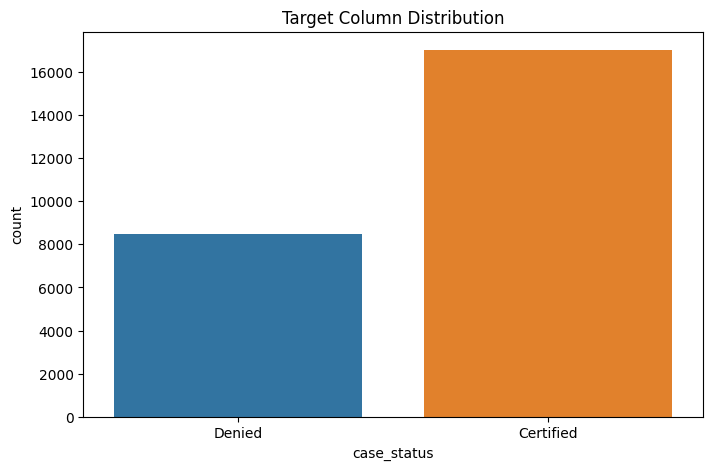

In [58]:
#checking the target column data distrubution ratio in bar plot
plt.figure(figsize=(8,5))
sns.countplot(x=df['case_status'])
plt.title('Target Column Distribution')
plt.show()



we clearly see from above that the target column is not dirstrubted properly so we will go for balancing dataset technique

tech to handle imbalance data: 

1: oversampling

2: undersampling

3: resampling

4: SMOT (synthetic minority oversampling tech)

In [60]:
#checking one one column against target column to check the impact:

df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

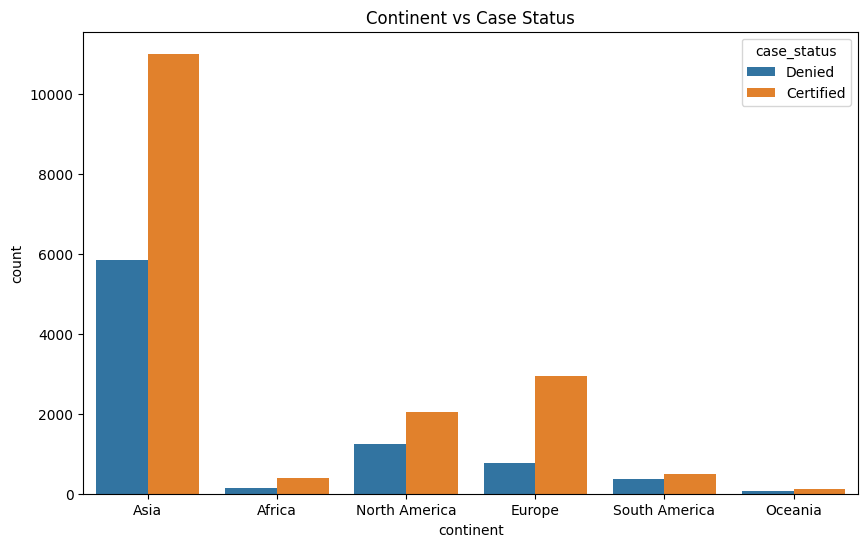

In [61]:
#plotting bar plot for above groupby
plt.figure(figsize=(10,6))
sns.countplot(x='continent',hue='case_status',data=df)
plt.title('Continent vs Case Status')
plt.show()

In [62]:
#now for education_of_employee column

df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

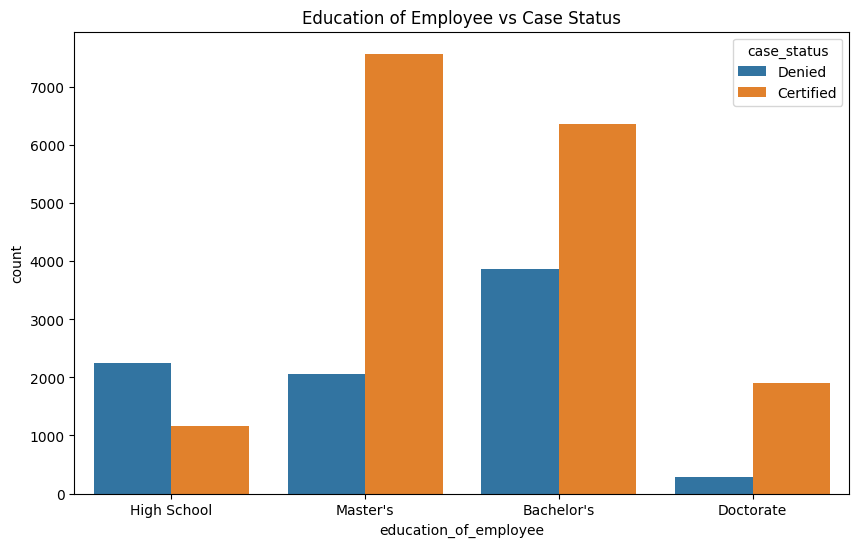

In [63]:
#plotting graph for above
plt.figure(figsize=(10,6))
sns.countplot(x='education_of_employee',hue='case_status',data=df)
plt.title('Education of Employee vs Case Status')
plt.show()


In [64]:
# has_job_experience column any impact on target column
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

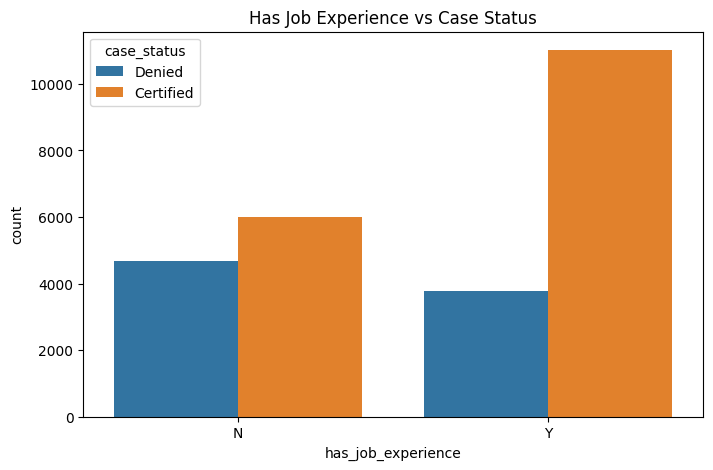

In [65]:
#graph for above
plt.figure(figsize=(8,5))
sns.countplot(x='has_job_experience',hue='case_status',data=df)
plt.title('Has Job Experience vs Case Status')
plt.show()  

In [71]:
# requires_job_training column impact on target column
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

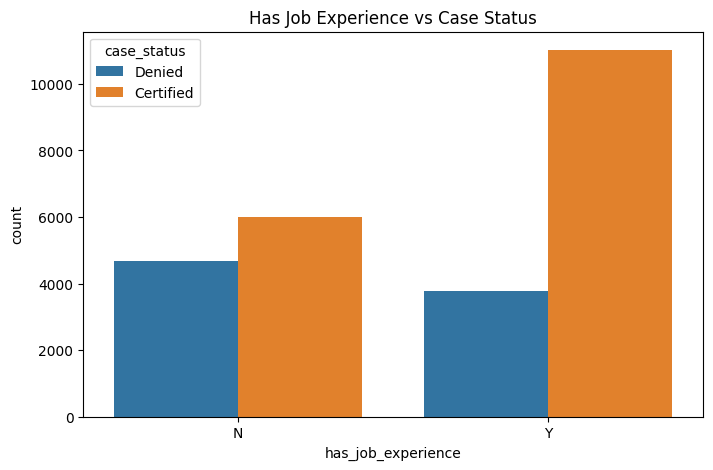

In [68]:
#graph for above
plt.figure(figsize=(8,5))
sns.countplot(x='has_job_experience',hue='case_status',data=df)
plt.title('Has Job Experience vs Case Status')
plt.show()  

In [72]:
# no_of_employees column impact on target column
df.groupby('no_of_employees')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
no_of_employees case_status            
-26             Certified     57.142857
                Denied        42.857143
-25             Certified     80.000000
                Denied        20.000000
-17             Certified     50.000000
...                                 ...
 547172         Certified    100.000000
 579004         Certified    100.000000
 581468         Certified    100.000000
 594472         Denied       100.000000
 602069         Certified    100.000000

[10689 rows x 1 columns]

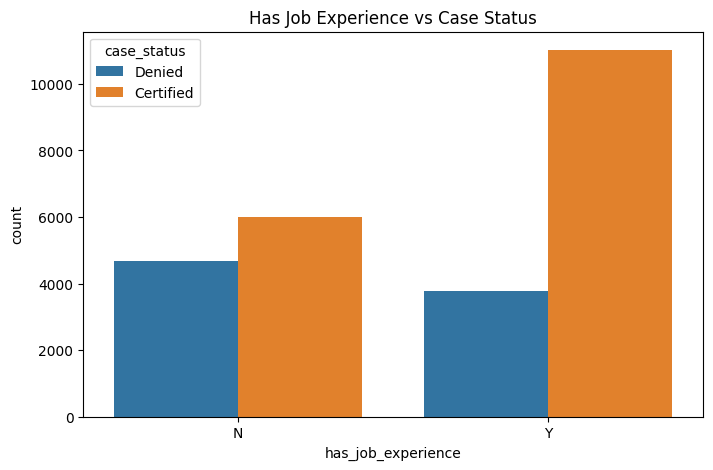

In [73]:
#graph for above
plt.figure(figsize=(8,5))
sns.countplot(x='has_job_experience',hue='case_status',data=df)         
plt.title('Has Job Experience vs Case Status')
plt.show()

### final report

1: region_of_employment can be dropped:

2: no_of_employee, prevaling_wage has outlier

3: continent column has few unique value which cab be made as others

4: target column is imbalaced and need to be handled for model building